In [1]:
# marker i need is gender, health, welath, race

# https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83779ENG&_theme=1092


import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle



      Sex PersonCharacteristics  k_20thPercentile_4  k_40thPercentile_5  \
0    male               western                -7.3                 1.0   
1    male           non-western                -7.0                 1.5   
2  female               western                -6.6                 1.1   
3  female           non-western                -6.2                 1.5   

   k_60thPercentile_6  k_80thPercentile_7  
0                 5.0                14.8  
1                 6.6                18.4  
2                 4.6                14.2  
3                 6.3                17.3  


<AxesSubplot: xlabel='percentile', ylabel='value'>

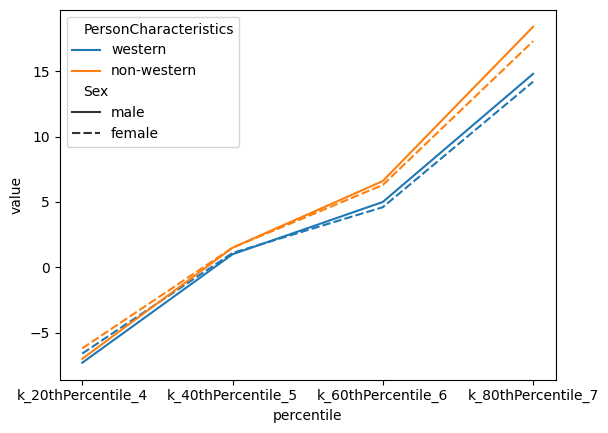

In [2]:
# 4000 women 
# 2012655 western
df = pd.read_csv("../data/ppd_intersect.csv", sep=';')
df = df.replace(4000, "female")
df = df.replace(3000, "male")
df = df.replace(2012655, "western")
df = df.replace(2012657, "non-western")
df = df.drop(["ID", "Periods"], axis = 1)
print(df)


df = df.melt(id_vars=["Sex", "PersonCharacteristics"], 
        var_name="percentile", 
        value_name="value")

sns.lineplot(y="value", x="percentile", hue = "PersonCharacteristics", style = "Sex", data = df)

In [3]:
#https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=83931NED&_theme=185
# 4000 women 
# 2012655 western
df = pd.read_csv("../data/income_is.csv", sep=';')
# df = df.replace(4000, "female")
# df = df.replace(3000, "male")
# df = df.replace(2012655, "western")
# df = df.replace(2012657, "non-western")
# df = df.replace(1012600, "dutch")



dict_trans = {  'A028702': '10%',
                'A028703' : '20%',
                'A028704' : '30%',
                'A028705' : '40%',
                'A028706' : '50%',
                'A028707' : '60%',
                'A028708' : '70%',
                'A028709' : '80%',
                'A028710' : '90%',
                'A028711' : '100%',
                4000: "female",
                3000: "male",
                2012655: "western",
                2012657: "non-western",
                1012600: "dutch", 
                
                }

df = df.replace(dict_trans)

df = df[df['Inkomensbegrippen'] == 'A043961'] 

df = df.drop(["ID", "Perioden", 'Inkomensbegrippen'], axis = 1)
df.set_index('KenmerkenVanPersonen')
# df.drop(["dutch"])


df = df[df.KenmerkenVanPersonen != 'dutch']

df

# df = df.melt(id_vars=["Sex", "PersonCharacteristics"], 
#         var_name="percentile", 
#         value_name="value")

# sns.scatterplot(y="PersonenMetInkomen_1", x="GemiddeldInkomen_2", hue = "KenmerkenVanPersonen", style = 'Geslacht', data = df)
# # ax.set(ylim=(10, 40))
# df.iloc[[0]]

# sample with frequency by subclass, from medium income by percentile

,Inkomensklassen,Geslacht,KenmerkenVanPersonen,PersonenMetInkomen_1,GemiddeldInkomen_2,MediaanInkomen_3
1,10%,male,western,45.3,0.5,1.0
2,10%,male,non-western,86.2,0.4,1.0
4,10%,female,western,54.6,0.8,1.1
5,10%,female,non-western,83.0,1.0,1.2
7,20%,male,western,40.9,6.3,6.2
8,20%,male,non-western,78.6,6.3,6.1
10,20%,female,western,56.9,6.4,6.3
11,20%,female,non-western,87.2,6.4,6.2
13,30%,male,western,40.7,14.6,14.5
14,30%,male,non-western,68.6,14.4,14.3


Text(0.5, 1.0, 'Probability over medium income in 10% percentile brackets')

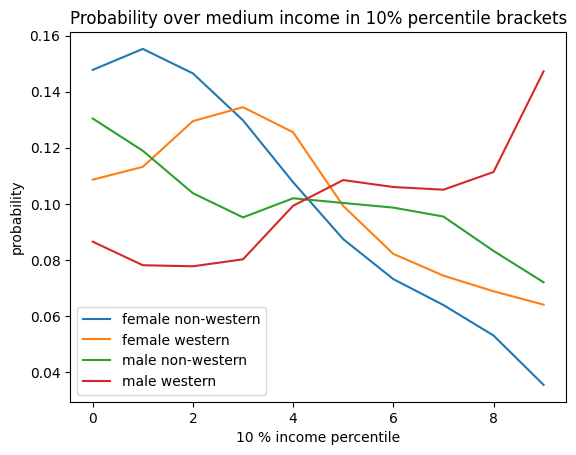

In [4]:
df1 = df.set_index('Geslacht')
df_m= df1.loc['male']
df_f = df1.loc['female'] 

df_mw = df_m.set_index('KenmerkenVanPersonen')
df_mw = df_mw.loc['western']
df_mw = df_mw.set_index('Inkomensklassen')
# df_mw[['PersonenMetInkomen_1','GemiddeldInkomen_2']]

df_mnw = df_m.set_index('KenmerkenVanPersonen')
df_mnw = df_mnw.loc['non-western']
df_mnw = df_mnw.set_index('Inkomensklassen')


df_fw = df_f.set_index('KenmerkenVanPersonen')
df_fw = df_fw.loc['western']
df_fw = df_fw.set_index('Inkomensklassen')
# df_mw[['PersonenMetInkomen_1','GemiddeldInkomen_2']]

df_fnw = df_f.set_index('KenmerkenVanPersonen')
df_fnw = df_fnw.loc['non-western']
df_fnw = df_fnw.set_index('Inkomensklassen')

# variable for n by gender and race
n_mw = df_mw[['PersonenMetInkomen_1']].sum()
n_mnw = df_mnw[['PersonenMetInkomen_1']].sum()
n_fw = df_fw[['PersonenMetInkomen_1']].sum()
n_fnw = df_fnw[['PersonenMetInkomen_1']].sum()

# maybe not normalize but cap at 1 -> divide by highest number over all gemiddelde inkom?
d_fnw= np.array(df_fnw[['PersonenMetInkomen_1']]/ df_fnw[['PersonenMetInkomen_1']].sum()).flatten()
d_mw = np.array(df_mw[['PersonenMetInkomen_1']]/ df_mw[['PersonenMetInkomen_1']].sum()).flatten()
d_mnw = np.array(df_mnw[['PersonenMetInkomen_1']]/ df_mnw[['PersonenMetInkomen_1']].sum()).flatten()
d_fw = np.array(df_fw[['PersonenMetInkomen_1']]/ df_fw[['PersonenMetInkomen_1']].sum()).flatten()


# with open("../data/distributions_init.pickle","wb") as f:
#     pickle.dump(d_fnw, f)
#     pickle.dump(d_mw, f)
#     pickle.dump(d_mnw, f)
#     pickle.dump(d_fw, f)


v_fnw = np.array(df_fnw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_mw = np.array(df_mw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_mnw = np.array(df_mnw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()
v_fw = np.array(df_fw[['GemiddeldInkomen_2']]/ df[['GemiddeldInkomen_2']].max()).flatten()

# with open("../data/values_init.pickle","wb") as f:
#     pickle.dump(v_fnw, f)
#     pickle.dump(v_mw, f)
#     pickle.dump(v_mnw, f)
#     pickle.dump(v_fw, f)

# with open(("../data/distributions_init.pickle"), "rb") as f:
#     d_fnw = pickle.load(f)
#     d_mw = pickle.load(f)
#     d_mnw = pickle.load(f)
#     d_fw = pickle.load(f)
# with open(("../data/distributions_init.pickle"), "rb") as f:
#     v_fnw = pickle.load(f)
#     v_mw = pickle.load(f)
#     v_mnw = pickle.load(f)
#     v_fw = pickle.load(f)




sns.lineplot(d_fnw, label = 'female non-western')
sns.lineplot(d_fw, label = 'female western')
sns.lineplot(d_mnw, label = 'male non-western').set(ylabel='probability', xlabel='10 % income percentile')
sns.lineplot(d_mw, label = 'male western').set_title('Probability over medium income in 10% percentile brackets')




The folloing graph shows samples of n = 100 by intersection. How 

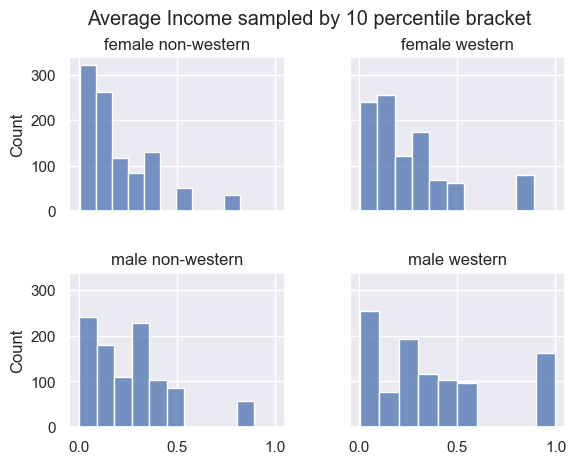

In [5]:

range10 = np.arange(1,11)
res_fnw = (random.choices(v_fnw, weights=d_fnw, k=1000))
res_mw = (random.choices(v_mw, weights=d_mw, k=1000))
res_mnw = (random.choices(v_mnw, weights=d_mnw, k=1000))
res_fw = (random.choices(v_fw, weights=d_fw, k=1000))






# sns.displot([res_fnw, res_fw,res_mnw,res_mw],kind  = 'kde') #, multiple ='dodge') #  label = 'res_fnw')

sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

#create boxplot in each subplot
ax1 = sns.histplot(data=res_fnw, bins = 10, ax=axes[0,0])
ax2 = sns.histplot(data=res_fw, bins = 10,  ax=axes[0,1])
ax3 = sns.histplot(data=res_mnw, bins = 10, ax=axes[1,0])
ax4 = sns.histplot(data=res_mw, bins = 10,  ax=axes[1,1])

ax1.title.set_text('female non-western')
ax2.title.set_text('female western')
ax3.title.set_text('male non-western')
ax4.title.set_text('male western')
plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
plt.suptitle('Average Income sampled by 10 percentile bracket')
plt.show()


# ax.legend(['female non-western','female western','male non-western', 'male western'])




<AxesSubplot: ylabel='Count'>

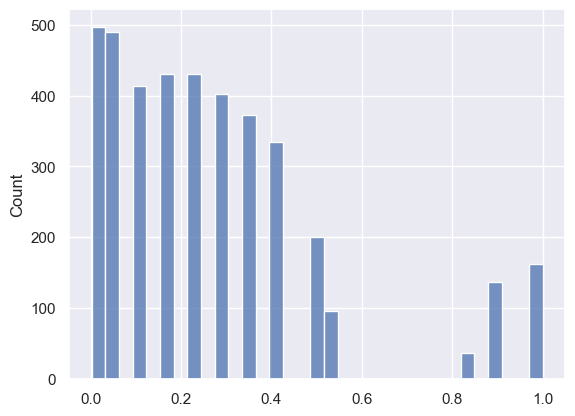

In [6]:
res_all = res_fnw + res_mw + res_mnw + res_fw
sns.histplot(res_all)



Looking at Fraud distribution

array([[0.04318489, 1.        ],
       [0.27867746, 0.        ],
       [0.00674764, 1.        ],
       ...,
       [0.00539811, 0.        ],
       [0.00539811, 1.        ],
       [0.04318489, 0.        ]])

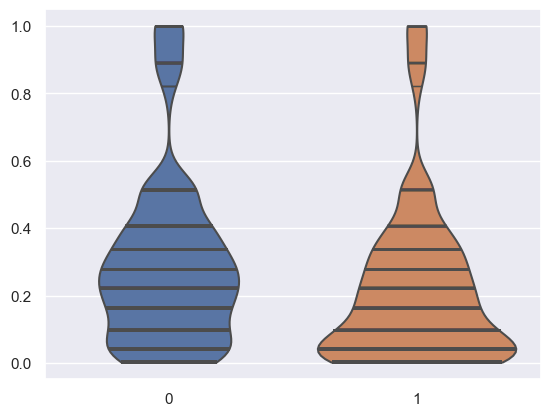

In [7]:
rng = np.random.default_rng()        
# fraud = rng.binomial(len(res_all),((np.array(res_all)**1.5)+0.1))


a=np.stack((np.array(res_all), rng.binomial(1,np.clip(((np.array(res_all)-0.75)**4+0.3), 0,0.9))), axis=-1)


# sns.histplot(np.clip((np.array(res_all)**1.4+0.3), 0,0.9))
sns.violinplot(y = np.array(res_all), x = rng.binomial(1,np.clip(((np.array(res_all)-0.75)**4+0.3), 0,0.9)),inner = 'stick',cut=0)
a

<AxesSubplot: ylabel='Count'>

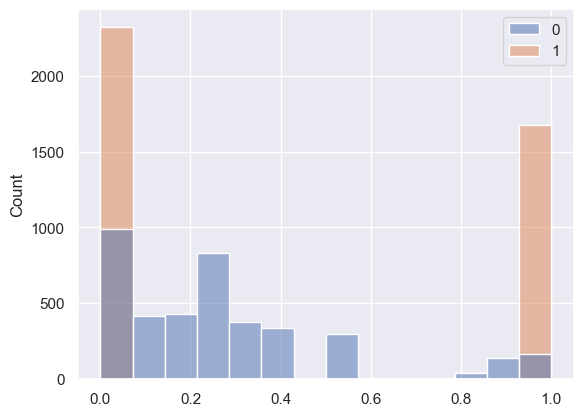

In [8]:
sns.histplot(a)

<AxesSubplot: ylabel='Count'>

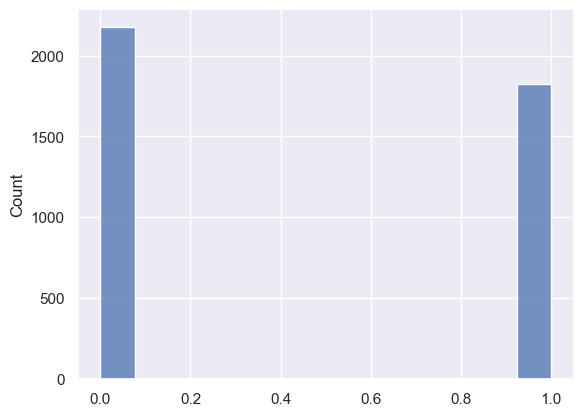

In [9]:
sns.histplot(rng.binomial(1,np.clip((np.array(res_all)**1.4+0.3), 0,0.9)))

In [10]:
# import statsmodels.api as sm
# import numpy as np

# x = np.array(df1[['GemiddeldInkomen_2']]).flatten()
# y = (np.arange(0,1,0.1))
# print(y,x)
# x_train = sm.add_constant(x)
# logit_model = sm.Logit(y,x_train)
# results = logit_model.fit()
# print(results.summary())
